In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = '/content/drive/My Drive/Colab Notebooks/mlb_전처리완료.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(data)

In [ ]:
import numpy as np

In [ ]:
features = df.columns
print(features)

Index(['IDfg', 'Age', 'PA1', 'HR1', 'R1', 'AVG1', 'BB%1', 'OBP1', 'SLG1',
       'Pos1', 'WAR1', 'BSR1', 'Def1', 'PA2', 'HR2', 'R2', 'AVG2', 'BB%2',
       'OBP2', 'SLG2', 'Pos2', 'WAR2', 'BSR2', 'Def2', 'PA3', 'HR3', 'R3',
       'AVG3', 'BB%3', 'OBP3', 'SLG3', 'Pos3', 'WAR3', 'BSR3', 'Def3', 'PA4',
       'HR4', 'R4', 'AVG4', 'BB%4', 'OBP4', 'SLG4', 'Pos4', 'WAR4', 'BSR4',
       'Def4', 'PA5', 'HR5', 'R5', 'AVG5', 'BB%5', 'OBP5', 'SLG5', 'Pos5',
       'WAR5', 'BSR5', 'Def5', 'PA6', 'HR6', 'R6', 'AVG6', 'BB%6', 'OBP6',
       'SLG6', 'Pos6', 'WAR6', 'BSR6', 'Def6', 'Next_WAR'],
      dtype='object')


Split x, y

In [ ]:
x = df[['Age', 'PA1', 'HR1', 'R1', 'AVG1', 'BB%1', 'OBP1', 'SLG1','Pos1', 'WAR1', 'BSR1', 'Def1',
       'PA2', 'HR2', 'R2', 'AVG2', 'BB%2','OBP2', 'SLG2', 'Pos2', 'WAR2', 'BSR2', 'Def2',
       'PA3', 'HR3', 'R3','AVG3', 'BB%3', 'OBP3', 'SLG3', 'Pos3', 'WAR3', 'BSR3', 'Def3',
       'PA4','HR4', 'R4', 'AVG4', 'BB%4', 'OBP4', 'SLG4', 'Pos4', 'WAR4', 'BSR4', 'Def4',
       'PA5', 'HR5', 'R5', 'AVG5', 'BB%5', 'OBP5', 'SLG5', 'Pos5', 'WAR5', 'BSR5', 'Def5',
       'PA6', 'HR6', 'R6', 'AVG6', 'BB%6', 'OBP6','SLG6', 'Pos6', 'WAR6', 'BSR6', 'Def6']]
y = df['Next_WAR']

In [ ]:
x_feature = x.columns
print(x_feature)

Index(['Age', 'PA1', 'HR1', 'R1', 'AVG1', 'BB%1', 'OBP1', 'SLG1', 'Pos1',
       'WAR1', 'BSR1', 'Def1', 'PA2', 'HR2', 'R2', 'AVG2', 'BB%2', 'OBP2',
       'SLG2', 'Pos2', 'WAR2', 'BSR2', 'Def2', 'PA3', 'HR3', 'R3', 'AVG3',
       'BB%3', 'OBP3', 'SLG3', 'Pos3', 'WAR3', 'BSR3', 'Def3', 'PA4', 'HR4',
       'R4', 'AVG4', 'BB%4', 'OBP4', 'SLG4', 'Pos4', 'WAR4', 'BSR4', 'Def4',
       'PA5', 'HR5', 'R5', 'AVG5', 'BB%5', 'OBP5', 'SLG5', 'Pos5', 'WAR5',
       'BSR5', 'Def5', 'PA6', 'HR6', 'R6', 'AVG6', 'BB%6', 'OBP6', 'SLG6',
       'Pos6', 'WAR6', 'BSR6', 'Def6'],
      dtype='object')


In [ ]:
# NaN 값을 0으로 대체
x.fillna(0, inplace=True)

# Clip very large or very small values
x = x.clip(lower=-1e10, upper=1e10)

<ipython-input-30-1549f232c389>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#훈련세트 테스트세트 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print("훈련 데이터 shape: ", x_train.shape, y_train.shape)
print("테스트 데이터 shape: ", x_test.shape, y_test.shape)

훈련 데이터 shape:  (1430, 67) (1430,)
테스트 데이터 shape:  (358, 67) (358,)


# **SelectKBest 를 이용한 특성 선택. (10개)**



In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# SelectKBest 객체 생성
select_feature = SelectKBest(score_func=mutual_info_regression, k=10)

# SelectKBest 객체를 특성과 타겟과 함께 fit
select_feature.fit(x_train, y_train)

# 선택된 특성의 인덱스 확인
selected_indices = select_feature.get_support(indices=True)

# 실제 특성 이름 가져오기
selected_feature_names = x_feature[selected_indices]

# 점수와 해당하는 특성 이름 표시
print('점수 목록:', select_feature.scores_)
print('특성 목록:', selected_feature_names)

# 특성 선택 수행
featured_x = select_feature.transform(x_train)

점수 목록: [0.08097829 0.01702829 0.         0.01634333 0.         0.05625708
 0.03094107 0.02081241 0.01535951 0.03405157 0.01984529 0.
 0.02008422 0.02695582 0.05357028 0.         0.02451714 0.02122942
 0.01207774 0.         0.01112381 0.         0.         0.01284918
 0.         0.         0.04806699 0.00454666 0.03224016 0.03408115
 0.02479506 0.04034867 0.03569631 0.02359554 0.0586914  0.02049328
 0.02987205 0.0277558  0.0639615  0.06846428 0.06422677 0.02124328
 0.13667068 0.01543645 0.00147409 0.07137925 0.03390621 0.06267788
 0.02247439 0.0368843  0.04888844 0.07229082 0.04991318 0.16362957
 0.01260351 0.00068996 0.08774706 0.0701332  0.04714049 0.03563585
 0.03810904 0.06529642 0.0922272  0.03184556 0.19877377 0.03813093
 0.03362523]
특성 목록: Index(['Age', 'OBP4', 'WAR4', 'PA5', 'SLG5', 'WAR5', 'PA6', 'HR6', 'SLG6',
       'WAR6'],
      dtype='object')


In [ ]:
# 특성과 점수를 묶은 리스트 생성
feature_scores = list(zip(selected_feature_names, select_feature.scores_))

# 점수를 기준으로 정렬
sorted_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
print("정렬된 특성 목록:")
for feature, score in sorted_feature_scores:
    print(f'{feature}: {score}')

정렬된 특성 목록:
Age: 0.08097828917726213
WAR5: 0.05625708423741749
WAR6: 0.034051574603041423
PA6: 0.030941074963140025
HR6: 0.02081241437246284
OBP4: 0.017028288857667384
PA5: 0.016343334647233476
SLG6: 0.015359509963261964
WAR4: 0.0
SLG5: 0.0


In [ ]:
import numpy as np
columns_to_drop = [2, 4]
featured_x = np.delete(featured_x, columns_to_drop, axis=1)

#SelectKBest로 선택한 특성들로 학습

랜덤포레스트로 학습

In [ ]:
#랜덤포레스트로 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# 랜덤 포레스트 모델 생성
random_forest_model = RandomForestRegressor(random_state=42)

# 랜덤 포레스트 모델에 대한 그리드 탐색을 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(featured_x, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 최적의 모델 얻기
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_de

In [ ]:
# 테스트 데이터에 대한 특성 선택 수행
x_test_selected = select_feature.transform(x_test)
columns_to_drop = [2, 4]
x_test_selected = np.delete(x_test_selected, columns_to_drop, axis=1)

# 학습된 모델을 사용하여 예측
y_pred = best_rf_model.predict(x_test_selected)

# R-squared 값 계산
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.5009695323479388
Mean Absolute Error: 2.9625862645686376


In [ ]:
import joblib
joblib.dump(best_rf_model,'/content/drive/My Drive/Colab Notebooks/best_rf_model.joblib')

['/content/drive/My Drive/Colab Notebooks/best_rf_model.joblib']

XGBoost로 학습

In [ ]:
#XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# XGBoost 모델 생성
xgb_model = XGBRegressor()

# 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(featured_x, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 최적의 모델 얻기
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsampl

In [ ]:
# 테스트 데이터에 대한 특성 선택 수행
x_test_selected = select_feature.transform(x_test)
columns_to_drop = [2, 4]
x_test_selected = np.delete(x_test_selected, columns_to_drop, axis=1)

# 학습된 모델을 사용하여 예측
y_pred = best_xgb_model.predict(x_test_selected)

# R-squared 값 계산
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.5244774612485793
Mean Absolute Error: 2.9157478555537475


라쏘로 학습

In [ ]:
#라쏘
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Lasso 모델 생성
lasso_model = Lasso()

# 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 3000],
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(featured_x, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 최적의 모델 얻기
best_lasso_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=3000; total time=   0.0s
[CV] END ..........................alpha=0.01, m

In [ ]:
# 테스트 데이터에 대한 특성 선택 수행
x_test_selected = select_feature.transform(x_test)
columns_to_drop = [2, 4]
x_test_selected = np.delete(x_test_selected, columns_to_drop, axis=1)

# 학습된 모델을 사용하여 예측
y_pred = best_lasso_model.predict(x_test_selected)

# R-squared 값 계산
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.47435801195433713
Mean Absolute Error: 3.0673446149411467


# **RFECV 이용한 특성선택**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# RFECV를 사용하여 특성 선택
rfr = RandomForestRegressor()
rfecv = RFECV(estimator=rfr, step=1, cv=5, scoring='r2', verbose=2)
rfecv = rfecv.fit(x_train, y_train)

Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 fe

In [ ]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['Age', 'OBP1', 'WAR1', 'Def2', 'WAR3', 'R4', 'WAR4', 'HR5', 'BB%5',
       'OBP5', 'WAR5', 'PA6', 'BB%6', 'WAR6'],
      dtype='object')


In [ ]:
# 선택된 특성의 중요도 가져오기
selected_feature_importances = rfecv.estimator_.feature_importances_

# 선택된 특성의 인덱스 가져오기
selected_feature_indices = np.where(rfecv.support_)[0]

# 중요도를 내림차순으로 정렬한 인덱스 가져오기
sorted_indices = np.argsort(selected_feature_importances)[::-1]

# 선택된 특성들의 이름과 중요도 출력
print("Selected features and their importances:")
for index in sorted_indices:
    feature_index = selected_feature_indices[index]
    feature_name = x_feature[feature_index]
    importance = selected_feature_importances[index]
    print(f"{feature_name}: {importance}")

Selected features and their importances:
WAR6: 0.3666874747276032
Age: 0.1191060112270823
WAR5: 0.08531479327629315
WAR4: 0.04963851076010548
OBP5: 0.04459984926714624
WAR3: 0.041101621031158934
HR5: 0.03951402515066192
Def2: 0.03904095404783131
R4: 0.037574201151943785
BB%5: 0.03596936946476736
BB%6: 0.03593950448166284
WAR1: 0.03533251710284571
PA6: 0.035188062253111566
OBP1: 0.03499310605778624


RFECV를 통해 추출된 특성들로 모델 학습

랜덤포레스트로 학습

In [ ]:
from sklearn.model_selection import GridSearchCV

# 선택된 특성으로 데이터 변환
x_train_selected = rfecv.transform(x_train)
x_test_selected = rfecv.transform(x_test)

# 랜덤 포레스트 회귀 모델을 위한 그리드 서치를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(x_train_selected, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 최적의 모델 얻기
best_rf_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred = best_rf_model.predict(x_test_selected)

# R-squared 값 계산
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_dep

# **XGBoost 를 이용한 특성 선택**

In [ ]:
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel

# XGBoost 회귀 모델 초기화
xgb = XGBRegressor()

# 특성 선택을 위한 모델 초기화
sfm = SelectFromModel(estimator=xgb, max_features=14)

# 특성 선택 수행
x_train_selected_xgboost = sfm.fit_transform(x_train, y_train)
x_test_selected_xgboost = sfm.transform(x_test)

# XGBoost 모델 학습
xgb.fit(x_train_selected_xgboost, y_train)

# 선택된 특성의 중요도 가져오기
selected_feature_importances_xgboost = xgb.feature_importances_

# 선택된 특성의 인덱스 가져오기
selected_feature_indices_xgboost = sfm.get_support(indices=True)

# 중요도를 내림차순으로 정렬한 인덱스 가져오기
sorted_indices_xgboost = selected_feature_importances_xgboost.argsort()[::-1]

# 선택된 특성들의 이름과 중요도 출력
print("Selected features and their importances (XGBoost):")
for index_xgboost in sorted_indices_xgboost:
    feature_index_xgboost = selected_feature_indices_xgboost[index_xgboost]
    feature_name_xgboost = x.columns[feature_index_xgboost]
    importance_xgboost = selected_feature_importances_xgboost[index_xgboost]
    print(f"{feature_name_xgboost}: {importance_xgboost}")

Selected features and their importances (XGBoost):
WAR6: 0.46215707063674927
Age: 0.10254830867052078
WAR5: 0.084724061191082
WAR4: 0.06812937557697296
OBP5: 0.05761438235640526
BB%6: 0.052683956921100616
HR5: 0.05183250457048416
SLG6: 0.04856044799089432
WAR3: 0.041005585342645645
BB%3: 0.03074434958398342


XGBoost로 추출된 특성들을 활용에 모델 학습 (XGBoost 모델 활용)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치를 위한 XGBoost 모델 초기화
xgb_grid = XGBRegressor()

# 그리드 서치를 위한 파라미터 그리드 정의
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# 그리드 서치 객체 초기화
grid_search_xgb = GridSearchCV(estimator=xgb_grid, param_grid=param_grid_xgb, cv=5, scoring='r2', verbose=2)

# 선택된 특성으로 데이터 변환
x_train_selected_xgboost = sfm.transform(x_train)
x_test_selected_xgboost = sfm.transform(x_test)

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_xgb.fit(x_train_selected_xgboost, y_train)

# 최적의 하이퍼파라미터 출력
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters (XGBoost):", best_params_xgb)

# 최적의 모델 얻기
best_xgb_model = grid_search_xgb.best_estimator_

# 테스트 데이터에 대한 예측
y_pred_xgb = best_xgb_model.predict(x_test_selected_xgboost)

# R-squared 값 계산
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'R-squared (XGBoost): {r2_xgb}')

# MAE (Mean Absolute Error) 계산
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.6s
[CV] END colsampl

# **라쏘를 이용한 특성선택**

In [ ]:
from sklearn.linear_model import Lasso

# 라쏘 회귀 모델 초기화
lasso = Lasso()

# 특성 선택을 위한 모델 초기화 (라쏘 회귀를 사용)
sfm_lasso = SelectFromModel(estimator=lasso, max_features=14)

# 특성 선택 수행
x_train_selected_lasso = sfm_lasso.fit_transform(x_train, y_train)
x_test_selected_lasso = sfm_lasso.transform(x_test)

# 라쏘 회귀 모델 학습
lasso.fit(x_train_selected_lasso, y_train)

# 선택된 특성의 계수 (중요도) 가져오기
selected_feature_coefficients_lasso = lasso.coef_

# 선택된 특성의 인덱스 가져오기
selected_feature_indices_lasso = sfm_lasso.get_support(indices=True)

# 중요도를 내림차순으로 정렬한 인덱스 가져오기
sorted_indices_lasso = selected_feature_coefficients_lasso.argsort()[::-1]

# 선택된 특성들의 이름과 중요도 출력
print("Selected features and their coefficients (Lasso):")
for index_lasso in sorted_indices_lasso:
    feature_index_lasso = selected_feature_indices_lasso[index_lasso]
    feature_name_lasso = x.columns[feature_index_lasso]
    coefficient_lasso = selected_feature_coefficients_lasso[index_lasso]
    print(f"{feature_name_lasso}: {coefficient_lasso}")


Selected features and their coefficients (Lasso):
WAR6: 1.8720094745639337
WAR5: 0.8987519539266122
WAR4: 0.24335664002876709
Age: -0.6854627801733277


Lasso로 추출된 특성들을 활용하여 모델 학습 (Lasso모델)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치를 위한 라쏘 모델 초기화
lasso_grid = Lasso()

# 그리드 서치를 위한 파라미터 그리드 정의
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# 그리드 서치 객체 초기화
grid_search_lasso = GridSearchCV(estimator=lasso_grid, param_grid=param_grid_lasso, cv=5, scoring='r2', verbose=2)

# 선택된 특성으로 데이터 변환
x_train_selected_lasso = sfm_lasso.transform(x_train)
x_test_selected_lasso = sfm_lasso.transform(x_test)

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search_lasso.fit(x_train_selected_lasso, y_train)

# 최적의 하이퍼파라미터 출력
best_params_lasso = grid_search_lasso.best_params_
print("Best Hyperparameters (Lasso):", best_params_lasso)

# 최적의 모델 얻기
best_lasso_model = grid_search_lasso.best_estimator_

# 테스트 데이터에 대한 예측
y_pred_lasso = best_lasso_model.predict(x_test_selected_lasso)

# R-squared 값 계산
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'R-squared (Lasso): {r2_lasso}')

# MAE (Mean Absolute Error) 계산
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error (Lasso): {mae_lasso}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................

# **PCA를 이용한 차원축소**

In [ ]:
#주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

In [ ]:
#주성분 분석
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

# 설명 분산 확인 및 누적 설명 분산 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 최적 주성분 수 찾기 (누적 설명 분산이 95% 이상이 되는 지점)
optimal_n_components = np.argmax(cumulative_explained_variance >= 0.80) + 1

# 결과 출력
print("누적 설명 분산: ", cumulative_explained_variance)
print("최적 주성분 수: ", optimal_n_components)

누적 설명 분산:  [0.27403331 0.38234773 0.45455052 0.51619739 0.57030178 0.61542287
 0.6479923  0.67649633 0.70379734 0.73024811 0.75535965 0.7738493
 0.78802582 0.80173916 0.8129403  0.82258022 0.83192689 0.84063166
 0.84890491 0.85681861 0.86428496 0.87153142 0.87860071 0.88549137
 0.89211841 0.89854378 0.90479795 0.9109684  0.91682085 0.92239932
 0.92784051 0.93323565 0.93827313 0.94327954 0.94812093 0.95271537
 0.95722756 0.96148731 0.96547942 0.96916654 0.9726909  0.97592106
 0.97909374 0.98194765 0.98475288 0.98738564 0.98949999 0.99116214
 0.99241456 0.99347226 0.99448797 0.99530833 0.99608558 0.99674309
 0.9973746  0.99791563 0.99840668 0.99869484 0.99896672 0.99921909
 0.99944994 0.99965932 0.99974093 0.9998135  0.99988208 0.99994376
 1.        ]
최적 주성분 수:  14


PCA를 통해 축소된 데이터를 활용해 모델 학습

In [ ]:
from sklearn.decomposition import PCA

# 최적 주성분 수로 PCA 수행
optimal_pca = PCA(n_components=14)
x_train_optimal_pca = optimal_pca.fit_transform(x_train)
x_test_optimal_pca = optimal_pca.transform(x_test)

# 결과 출력
print("원본 훈련 데이터 shape: ", x_train.shape)
print("최적 주성분 수로 PCA 적용 후 훈련 데이터 shape: ", x_train_optimal_pca.shape)
print("최적 주성분 수로 PCA 적용 후 테스트 데이터 shape: ", x_test_optimal_pca.shape)

원본 훈련 데이터 shape:  (1430, 67)
최적 주성분 수로 PCA 적용 후 훈련 데이터 shape:  (1430, 14)
최적 주성분 수로 PCA 적용 후 테스트 데이터 shape:  (358, 14)


랜덤포레스트로 학습

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error


# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2',  verbose=2)

grid_search.fit(x_train_optimal_pca, y_train)

# 최적의 모델 확인
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_de

In [ ]:
# 테스트 세트에 대한 예측
y_pred = best_rf_model.predict(x_test_optimal_pca)

# 최적의 하이퍼파라미터 출력
print(f'Best Hyperparameters: {grid_search.best_params_}')

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error on Test Set: 3.147189944134079
R-squared: 0.4174374111541027


XGBoost로 학습

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# XGBoost 모델 생성
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(x_train_optimal_pca, y_train)

# 최적의 모델 확인
best_xgb_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsampl

In [ ]:
# 테스트 세트에 대한 예측
y_pred = best_xgb_model.predict(x_test_optimal_pca)

# 최적의 하이퍼파라미터 출력
print(f'Best Hyperparameters: {grid_search.best_params_}')

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Mean Absolute Error on Test Set: 3.1378952220956378
R-squared: 0.4145135094745944


라쏘로 학습

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Lasso 모델 생성
lasso_model = Lasso()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 3000],
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(x_train_optimal_pca, y_train)

# 최적의 모델 확인
best_lasso_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=1000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=2000; total time=   0.0s
[CV] END ..........................alpha=0.01, max_iter=3000; total time=   0.0s
[CV] END ..........................alpha=0.01, m

In [ ]:
# 테스트 세트에 대한 예측
y_pred = best_lasso_model.predict(x_test_optimal_pca)

# 최적의 하이퍼파라미터 출력
print(f'Best Hyperparameters: {grid_search.best_params_}')

# 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Best Hyperparameters: {'alpha': 0.01, 'max_iter': 1000}
Mean Absolute Error on Test Set: 3.172903560708406
R-squared: 0.4356191135669626


#모델 성능 비교

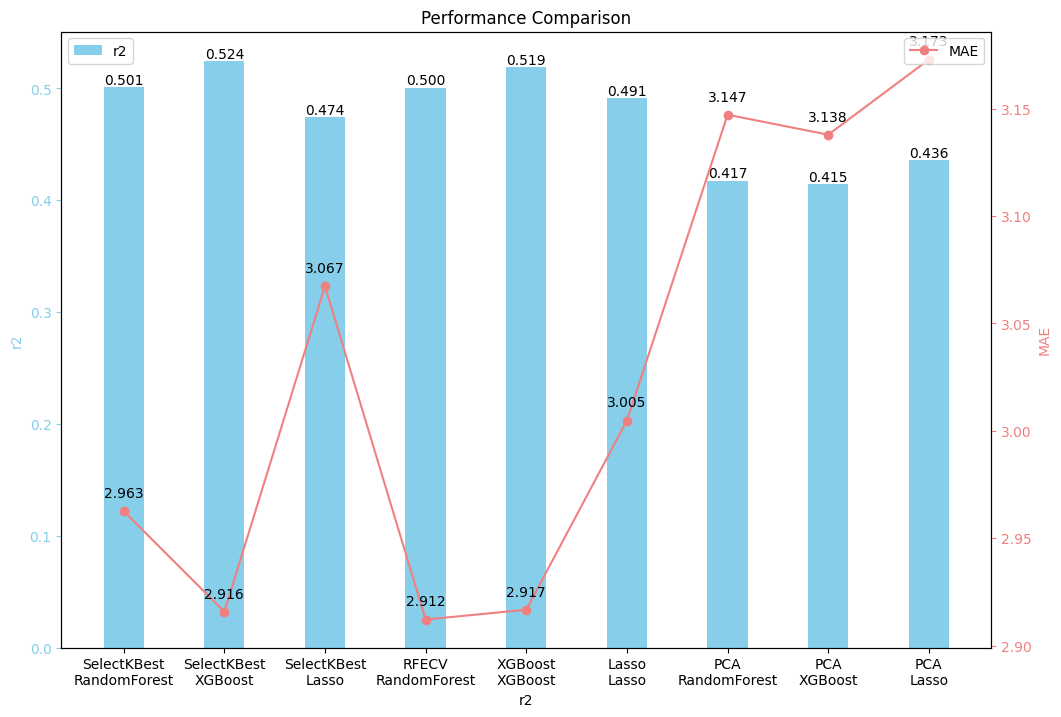

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#데이터
method_array=['SelectKBest\nRandomForest','SelectKBest\nXGBoost','SelectKBest\nLasso','RFECV\nRandomForest','XGBoost\nXGBoost','Lasso\nLasso','PCA\nRandomForest','PCA\nXGBoost','PCA\nLasso']
r2_array=[0.5009695323479388,0.5244774612485793,0.47435801195433713,0.5004945648882648,0.5185838119129544,0.4908742065409222,0.4174374111541027,0.4145135094745944,0.4356191135669626]
MAE_array=[2.9625862645686376,2.9157478555537475,3.0673446149411467,2.912105082085592,2.9166737861015615,3.0047893954954716,3.147189944134079,3.1378952220956378,3.172903560708406]

# 첫 번째 축에 막대 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12,8))

# 막대 그래프
bar_width = 0.4
indices = np.arange(len(method_array))
bars = ax1.bar(indices, r2_array, bar_width, label='r2', color='skyblue')

for bar, value in zip(bars, r2_array):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.3f}'.format(value),
             ha='center', va='bottom', fontsize=10, color='black')

# 첫 번째 축 설정
ax1.set_xlabel('r2')
ax1.set_ylabel('r2', color='skyblue')
ax1.tick_params('y', colors='skyblue')
ax1.set_xticks(indices,method_array)
ax1.set_xticklabels(method_array)

# 두 번째 축 생성 (선 그래프용)
ax2 = ax1.twinx()

# 선 그래프
line = ax2.plot(indices, MAE_array, label='MAE', color='lightcoral', marker='o')

for i, txt in enumerate(MAE_array):
    label = f'{txt:.3f}'
    ax2.annotate(label, (i, MAE_array[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 두 번째 축 설정
ax2.set_ylabel('MAE', color='lightcoral')
ax2.tick_params('y', colors='lightcoral')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 제목 추가
plt.title('Performance Comparison')

# 그래프 표시
plt.show()

#Best Model 평가

훈련 세트와 테스트 세트의 R2 score, MAE 확인

In [ ]:
#훈련 세트의 R2 score, MAE 확인

x_train_selected=select_feature.transform(x_train)
columns_to_drop=[2,4]
x_train_selected=np.delete(x_train_selected,columns_to_drop,axis=1)
train_y_pred=best_rf_model.predict(x_train_selected)

# Calculate R2 score
r2 = r2_score(y_train, train_y_pred)
print(f'R-squared: {r2}')

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_train, train_y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.6141524577192585
Mean Absolute Error: 2.817611010971314


In [ ]:
# 테스트 데이터에 대한 특성 선택 수행
x_test_selected = select_feature.transform(x_test)
columns_to_drop = [2, 4]
x_test_selected = np.delete(x_test_selected, columns_to_drop, axis=1)

# 학습된 모델을 사용하여 예측
y_pred = best_xgb_model.predict(x_test_selected)

# R-squared 값 계산
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# MAE (Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: 0.5244774612485793
Mean Absolute Error: 2.9157478555537475


예측값과 실제값 비교 (선수별)

In [ ]:
#y_train의 인덱스를 이용, df에서 train으로 사용된 데이터 추출

#create empty dataframe
df_compare_train=pd.DataFrame(columns=df.columns)

row=0 #variable that stores index of df_compare_train

for i in y_train.index.values:
  df_compare_train.loc[row,:]=df.loc[i,:]
  row+=1
df_compare_train

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,R6,AVG6,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR
0,9272(1),28,317.0,0.057627,0.160883,0.285,0.063,0.331,0.549,-3.0,...,0.153046,0.286,0.107,0.37,0.634,-12.4,7.1,4.7,-12.8,8.3
1,1000743(1),30,653.0,0.004886,0.111792,0.239,0.043,0.275,0.298,3.7,...,0.156646,0.288,0.051,0.323,0.349,3.3,0.0,0.6,-0.7,2.4
2,656(1),27,140.0,0.014925,0.135714,0.269,0.014,0.279,0.388,0.8,...,0.067308,0.245,0.058,0.295,0.318,1.3,-0.1,-1.1,5.7,1.0
3,217(2),36,519.0,0.021413,0.111753,0.266,0.079,0.332,0.392,9.0,...,0.110039,0.255,0.137,0.367,0.421,9.1,2.6,-1.1,7.1,-0.6
4,1006437(1),30,331.5,0.056418,0.121392,0.25675,0.1405,0.37325,0.482,-0.55,...,0.135693,0.297,0.127,0.407,0.584,-4.4,3.6,-0.5,-5.4,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1433(1),28,400.75,0.039537,0.094012,0.25875,0.0565,0.2995,0.418,7.35,...,0.081349,0.229,0.042,0.258,0.358,9.1,-0.5,-1.7,3.6,7.7
1426,3174(1),28,470.0,0.034394,0.141167,0.29725,0.1155,0.388,0.4935,-5.125,...,0.125387,0.3,0.128,0.401,0.484,-6.6,6.1,1.9,-0.3,11.6
1427,1013142(1),30,648.6,0.011856,0.141638,0.2774,0.0664,0.3348,0.3858,0.88,...,0.165289,0.3,0.072,0.356,0.442,-2.5,3.5,0.3,-3.5,7.6
1428,513(2),31,612.0,0.003724,0.124183,0.263,0.109,0.344,0.341,2.0,...,0.128834,0.296,0.086,0.358,0.37,2.1,2.2,0.6,3.4,5.1


In [ ]:
#df_compare에 y_pred column 추가
df_compare_train['predicted_WAR']=train_y_pred
#df_compare에 예측값과 실제값의 차 추가
df_compare_train['difference']=((df_compare_train['predicted_WAR']-df_compare_train['Next_WAR'])**2)**0.5
df_compare_train

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR,predicted_WAR,difference
0,9272(1),28,317.0,0.057627,0.160883,0.285,0.063,0.331,0.549,-3.0,...,0.107,0.37,0.634,-12.4,7.1,4.7,-12.8,8.3,11.717388,3.417388
1,1000743(1),30,653.0,0.004886,0.111792,0.239,0.043,0.275,0.298,3.7,...,0.051,0.323,0.349,3.3,0.0,0.6,-0.7,2.4,1.706027,0.693973
2,656(1),27,140.0,0.014925,0.135714,0.269,0.014,0.279,0.388,0.8,...,0.058,0.295,0.318,1.3,-0.1,-1.1,5.7,1.0,1.693491,0.693491
3,217(2),36,519.0,0.021413,0.111753,0.266,0.079,0.332,0.392,9.0,...,0.137,0.367,0.421,9.1,2.6,-1.1,7.1,-0.6,3.397618,3.997618
4,1006437(1),30,331.5,0.056418,0.121392,0.25675,0.1405,0.37325,0.482,-0.55,...,0.127,0.407,0.584,-4.4,3.6,-0.5,-5.4,2.5,5.630336,3.130336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1433(1),28,400.75,0.039537,0.094012,0.25875,0.0565,0.2995,0.418,7.35,...,0.042,0.258,0.358,9.1,-0.5,-1.7,3.6,7.7,2.878003,4.821997
1426,3174(1),28,470.0,0.034394,0.141167,0.29725,0.1155,0.388,0.4935,-5.125,...,0.128,0.401,0.484,-6.6,6.1,1.9,-0.3,11.6,16.050205,4.450205
1427,1013142(1),30,648.6,0.011856,0.141638,0.2774,0.0664,0.3348,0.3858,0.88,...,0.072,0.356,0.442,-2.5,3.5,0.3,-3.5,7.6,7.342260,0.25774
1428,513(2),31,612.0,0.003724,0.124183,0.263,0.109,0.344,0.341,2.0,...,0.086,0.358,0.37,2.1,2.2,0.6,3.4,5.1,4.865158,0.234842


예측값과 실제값의 차이를 기준으로 정렬

In [ ]:
#차이가 작은 순으로 정렬
df_compare_train.sort_values(by='difference',ascending=True).head(10)

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR,predicted_WAR,difference
1342,1008145(2),28,110.0,0.052632,0.090909,0.242,0.118,0.336,0.432,-1.2,...,0.042,0.327,0.46,-4.5,0.8,-2.3,-10.5,3.4,3.401804,0.001804
396,8370(2),32,351.0,0.039735,0.150997,0.288,0.105,0.367,0.493,1.1,...,0.089,0.356,0.441,1.3,2.3,-0.9,0.6,4.2,4.202648,0.002648
674,1004114,28,298.4,0.018785,0.079327,0.2484,0.103,0.3268,0.3526,4.58,...,0.106,0.347,0.419,2.2,0.5,-0.5,-5.8,3.6,3.595695,0.004305
69,256(2),34,497.0,0.037383,0.130785,0.224,0.127,0.323,0.393,6.4,...,0.095,0.313,0.463,6.2,3.9,2.6,18.1,5.4,5.409615,0.009615
268,1001589(1),26,618.0,0.04754,0.117937,0.2502,0.1022,0.328,0.4494,-6.14,...,0.081,0.315,0.423,-7.0,1.8,0.8,-1.0,7.3,7.310580,0.01058
267,5209(2),33,690.0,0.037643,0.146377,0.303,0.097,0.376,0.502,-6.9,...,0.103,0.312,0.38,-5.7,1.0,0.6,0.0,2.3,2.311090,0.01109
603,369(2),30,358.0,0.027692,0.134078,0.249,0.089,0.317,0.406,1.2,...,0.127,0.402,0.545,-1.6,2.1,-0.6,-2.2,4.5,4.512190,0.01219
476,1005641(1),33,204.0,0.038251,0.093137,0.202,0.093,0.279,0.372,2.7,...,0.088,0.257,0.337,1.7,0.0,0.0,1.7,1.5,1.483580,0.01642
630,1006336,32,152.0,0.015038,0.111842,0.226,0.079,0.291,0.308,-2.9,...,0.13,0.354,0.494,-3.7,0.9,0.2,-1.7,3.5,3.524352,0.024352
659,1003608(2),37,157.0,0.022388,0.101911,0.224,0.127,0.318,0.306,-1.8,...,0.122,0.339,0.488,-3.3,0.7,-0.8,-3.3,2.0,1.973311,0.026689


In [ ]:
#차이가 큰 순으로 정렬
df_compare_train.sort_values(by='difference',ascending=False).head(10)

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR,predicted_WAR,difference
429,1887(1),29,477.75,0.036857,0.121403,0.2405,0.1105,0.334,0.41175,-0.325,...,0.139,0.349,0.408,-2.9,1.8,1.4,1.6,21.8,6.139442,15.660558
1151,1014396(1),24,364.0,0.008721,0.131868,0.25,0.033,0.276,0.346,6.0,...,0.056,0.308,0.371,9.1,2.5,-0.9,17.1,26.8,12.033970,14.76603
1332,1001942(1),27,561.0,0.015564,0.117647,0.292,0.066,0.341,0.409,3.2,...,0.073,0.369,0.379,3.2,4.3,0.4,9.2,26.4,12.196632,14.203368
508,1119(1),30,343.0,0.036066,0.151603,0.239,0.079,0.312,0.43,0.9,...,0.074,0.316,0.472,1.1,4.1,0.9,16.1,20.1,6.620202,13.479798
384,1012186(1),29,668.0,0.001695,0.103293,0.258,0.07,0.311,0.312,9.1,...,0.102,0.321,0.335,8.3,3.4,3.9,20.3,20.8,7.616894,13.183106
505,5235(1),30,302.0,0.013799,0.101914,0.28725,0.06675,0.344,0.4065,0.7,...,0.087,0.404,0.493,1.2,3.4,0.7,-1.0,18.5,5.477048,13.022952
808,745(1),27,404.25,0.041105,0.127939,0.26625,0.1115,0.3495,0.46675,-9.125,...,0.092,0.339,0.5,-11.1,1.1,-3.7,-11.2,18.0,5.192030,12.80797
307,1013862(1),28,590.75,0.026358,0.136133,0.246,0.059,0.29375,0.3865,-0.825,...,0.087,0.29,0.343,1.7,0.8,1.7,2.7,19.8,7.907023,11.892977
664,1002841(1),28,350.0,0.024221,0.115609,0.2508,0.1188,0.339,0.3884,-2.2,...,0.138,0.358,0.403,-4.0,2.6,0.1,5.0,18.4,6.664095,11.735905
1064,12861(2),30,683.0,0.034258,0.162518,0.287,0.085,0.351,0.473,2.3,...,0.124,0.412,0.598,2.2,6.8,0.4,2.3,3.6,14.950052,11.350052


test set에 대해서도 같은 작업 수행

In [ ]:
#y_test의 인덱스를 이용, df에서 test로 사용된 데이터 추출
row=0
df_compare=pd.DataFrame(columns=df.columns)
for i in y_test.index.values:
  df_compare.loc[row,:]=df.loc[i,:]
  row+=1
df_compare

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,R6,AVG6,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR
0,6848(2),30,338.0,0.016181,0.112426,0.265,0.065,0.313,0.385,1.7,...,0.122689,0.288,0.049,0.325,0.432,3.0,2.5,2.9,1.0,0.0
1,1018(1),29,268.4,0.033874,0.111251,0.243,0.0586,0.2918,0.4098,-2.86,...,0.162983,0.3,0.044,0.332,0.535,-4.3,3.0,1.4,8.7,5.7
2,1006437(2),35,339.0,0.076923,0.135693,0.297,0.127,0.407,0.584,-4.4,...,0.077869,0.238,0.107,0.324,0.383,-5.7,0.0,-0.6,-6.7,5.5
3,3797(1),28,427.0,0.024194,0.107728,0.247,0.103,0.327,0.384,4.8,...,0.117333,0.268,0.075,0.32,0.394,4.4,2.1,-1.1,11.8,13.1
4,2437(1),29,121.0,0.009346,0.082645,0.206,0.083,0.286,0.318,1.1,...,0.169336,0.3,0.08,0.359,0.434,1.4,3.2,3.6,8.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1717(1),30,107.0,0.045977,0.140187,0.287,0.178,0.421,0.529,-0.9,...,0.165672,0.286,0.121,0.373,0.522,-6.9,3.0,5.3,-24.8,5.4
354,589(2),37,706.0,0.044554,0.164306,0.284,0.13,0.376,0.5,2.3,...,0.131667,0.296,0.063,0.339,0.491,-6.2,2.7,0.9,-14.7,2.4
355,1007590(1),32,339.0,0.016502,0.082596,0.257,0.08,0.331,0.356,0.7,...,0.119355,0.269,0.119,0.374,0.394,0.1,0.4,-0.3,-8.9,4.8
356,1004669(2),35,521.0,0.063492,0.161228,0.268,0.131,0.371,0.492,-5.5,...,0.15,0.236,0.128,0.341,0.403,-7.3,0.8,2.0,-17.3,2.3


In [ ]:
#df_compare에 y_pred column 추가
df_compare['predicted_WAR']=y_pred
#df_compare에 예측값과 실제값의 차 추가
df_compare['difference']=((df_compare['predicted_WAR']-df_compare['Next_WAR'])**2)**0.5
df_compare

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR,predicted_WAR,difference
0,6848(2),30,338.0,0.016181,0.112426,0.265,0.065,0.313,0.385,1.7,...,0.049,0.325,0.432,3.0,2.5,2.9,1.0,0.0,3.695040,3.69504
1,1018(1),29,268.4,0.033874,0.111251,0.243,0.0586,0.2918,0.4098,-2.86,...,0.044,0.332,0.535,-4.3,3.0,1.4,8.7,5.7,3.559275,2.140725
2,1006437(2),35,339.0,0.076923,0.135693,0.297,0.127,0.407,0.584,-4.4,...,0.107,0.324,0.383,-5.7,0.0,-0.6,-6.7,5.5,1.698113,3.801887
3,3797(1),28,427.0,0.024194,0.107728,0.247,0.103,0.327,0.384,4.8,...,0.075,0.32,0.394,4.4,2.1,-1.1,11.8,13.1,5.443911,7.656089
4,2437(1),29,121.0,0.009346,0.082645,0.206,0.083,0.286,0.318,1.1,...,0.08,0.359,0.434,1.4,3.2,3.6,8.3,2.2,5.785790,3.58579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1717(1),30,107.0,0.045977,0.140187,0.287,0.178,0.421,0.529,-0.9,...,0.121,0.373,0.522,-6.9,3.0,5.3,-24.8,5.4,5.475522,0.075522
354,589(2),37,706.0,0.044554,0.164306,0.284,0.13,0.376,0.5,2.3,...,0.063,0.339,0.491,-6.2,2.7,0.9,-14.7,2.4,4.357893,1.957893
355,1007590(1),32,339.0,0.016502,0.082596,0.257,0.08,0.331,0.356,0.7,...,0.119,0.374,0.394,0.1,0.4,-0.3,-8.9,4.8,3.333331,1.466669
356,1004669(2),35,521.0,0.063492,0.161228,0.268,0.131,0.371,0.492,-5.5,...,0.128,0.341,0.403,-7.3,0.8,2.0,-17.3,2.3,2.079148,0.220852


In [ ]:
#예측값과 실제값의 차가 적은 순대로 정렬 (오름차순)
df_compare.sort_values(by='difference',ascending=True).head(10)
#예측값과 실제값의 차가 적은 순대로 정렬 (내림차순)
df_compare.sort_values(by='difference',ascending=False).head(10)

,IDfg,Age,PA1,HR1,R1,AVG1,BB%1,OBP1,SLG1,Pos1,...,BB%6,OBP6,SLG6,Pos6,WAR6,BSR6,Def6,Next_WAR,predicted_WAR,difference
284,1297(2),34,711.0,0.072056,0.161744,0.344,0.173,0.47,0.664,-12.3,...,0.117,0.399,0.582,-10.4,3.3,-2.3,-25.6,6.1,6.100543,0.000543
333,1012426(2),39,609.0,0.084291,0.174056,0.299,0.131,0.392,0.646,-6.7,...,0.111,0.382,0.567,-6.3,3.6,-0.1,-12.3,3.8,3.808867,0.008867
245,1389(2),36,210.0,0.015873,0.133333,0.259,0.086,0.327,0.376,1.2,...,0.172,0.317,0.188,0.7,0.1,0.2,6.7,0.4,0.380854,0.019146
339,4962(1),27,186.0,0.018868,0.16129,0.283,0.091,0.354,0.421,0.8,...,0.084,0.338,0.423,5.3,2.5,-1.3,-4.4,9.3,9.353621,0.053621
116,1007190,31,117.0,0.0,0.051282,0.157,0.103,0.243,0.196,1.1,...,0.09,0.278,0.248,2.0,0.0,-0.3,4.0,0.8,0.864643,0.064643
145,1008318(2),31,668.0,0.027682,0.122754,0.28,0.123,0.37,0.431,-5.3,...,0.197,0.425,0.376,-0.9,1.1,0.3,-0.9,1.4,1.329432,0.070568
347,826(2),37,752.0,0.029052,0.162234,0.309,0.102,0.389,0.45,6.9,...,0.085,0.34,0.37,6.2,2.3,1.0,1.8,5.2,5.275038,0.075038
353,1717(1),30,107.0,0.045977,0.140187,0.287,0.178,0.421,0.529,-0.9,...,0.121,0.373,0.522,-6.9,3.0,5.3,-24.8,5.4,5.475522,0.075522
309,1013872(2),36,390.0,0.024725,0.089744,0.25,0.049,0.285,0.376,2.8,...,0.069,0.322,0.465,4.4,4.3,-0.8,15.4,4.5,4.392191,0.107809
141,3797(2),31,629.0,0.042179,0.124006,0.283,0.083,0.343,0.478,6.5,...,0.059,0.306,0.433,7.3,3.2,-3.3,12.9,4.4,4.269601,0.130399


Draw Plots which compare preicted WAR and actual WAR

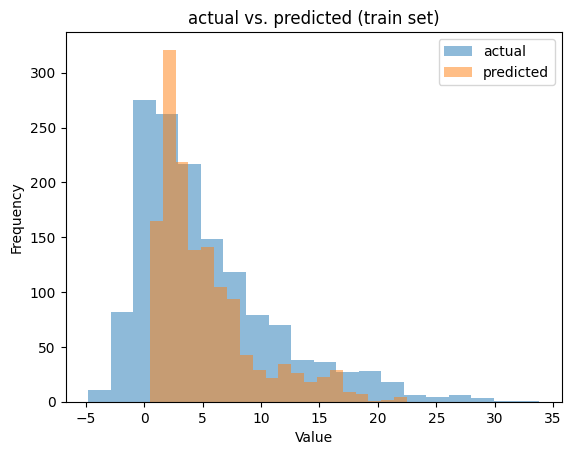

In [ ]:
#draw plot on train set
import matplotlib.pyplot as plt
plt.hist(y_train, alpha=0.5, label='actual', bins=20)
plt.hist(train_y_pred, alpha=0.5, label='predicted', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('actual vs. predicted (train set)')
plt.show()

<ipython-input-77-45db254be9b5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train, label='actual', shade=True)
<ipython-input-77-45db254be9b5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_y_pred, label='predicted', shade=True)


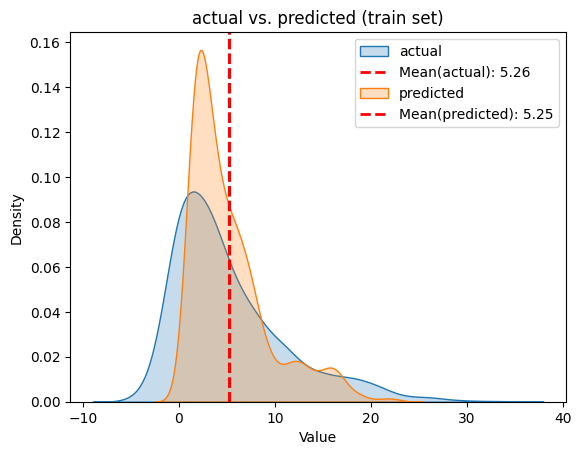

In [ ]:
import seaborn as sns
sns.kdeplot(y_train, label='actual', shade=True)
plt.axvline(y_train.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean(actual): {y_train.mean():.2f}')
sns.kdeplot(train_y_pred, label='predicted', shade=True)
plt.axvline(train_y_pred.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean(predicted): {train_y_pred.mean():.2f}')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('y_train')
plt.legend()
plt.title('actual vs. predicted (train set)')
plt.show()

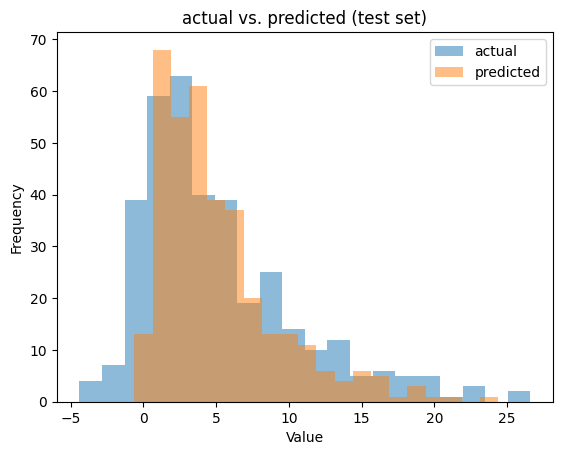

In [ ]:
#draw plot on test set
import matplotlib.pyplot as plt
plt.hist(y_test, alpha=0.5, label='actual', bins=20)
plt.hist(y_pred, alpha=0.5, label='predicted', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('actual vs. predicted (test set)')
plt.show()

<ipython-input-79-dbeb8ee9aa52>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='actual', shade=True)
<ipython-input-79-dbeb8ee9aa52>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='predicted', shade=True)


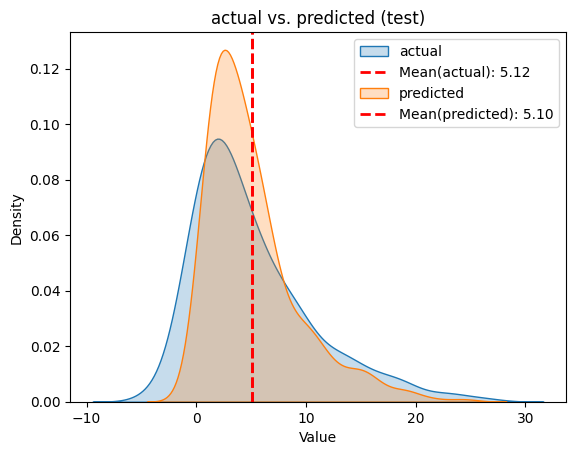

In [ ]:
import seaborn as sns
sns.kdeplot(y_test, label='actual', shade=True)
plt.axvline(y_test.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean(actual): {y_test.mean():.2f}')
sns.kdeplot(y_pred, label='predicted', shade=True)
plt.axvline(y_pred.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean(predicted): {y_pred.mean():.2f}')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('actual vs. predicted (test)')
plt.legend()
plt.show()